In [ ]:
import pandas as pd
import re as re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(df1)

891

In [ ]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

In [ ]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
z=df1
full_data=[df1,df2]
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
print (df1[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())




    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [ ]:
for dataset in full_data:
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
full_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [ ]:
df1.groupby(['Cabin']).Survived.mean().astype(int)

Cabin
A10    0
A14    0
A16    1
A19    0
A20    1
      ..
F33    1
F38    0
F4     1
G6     0
T      0
Name: Survived, Length: 147, dtype: int64

In [ ]:
df1.groupby(['Ticket']).Survived.mean().astype(int)

Ticket
110152         1
110413         0
110465         0
110564         1
110813         1
              ..
W./C. 6608     0
W./C. 6609     0
W.E.P. 5734    0
W/C 14208      0
WE/P 5735      0
Name: Survived, Length: 681, dtype: int64

In [ ]:
maped=df1.groupby(['Cabin']).Survived.mean().astype(int)
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].map(maped)
    dataset['Cabin'].fillna(value=2, inplace=True)
maped=df1.groupby(['Ticket']).Survived.mean().astype(int)
for dataset in full_data:
    dataset['Ticket'] = dataset['Ticket'].map(maped)
    dataset['Ticket'].fillna(value=2, inplace=True)

In [ ]:

    

for dataset in full_data:
    #dataset['IsAlone'] = 0
    #dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']  

x=df1.drop(['Survived','PassengerId','Name','Sex','SibSp','Parch'],axis=1)
x.head()

,Pclass,Age,Ticket,Fare,Cabin,Embarked
0,3,22.0,A/5 21171,7.2500,NaN,S
1,1,38.0,PC 17599,71.2833,C85,C
2,3,26.0,STON/O2. 3101282,7.9250,NaN,S
3,1,35.0,113803,53.1000,C123,S
4,3,35.0,373450,8.0500,NaN,S


In [ ]:
pd.get_dummies(x,columns=['Embarked'],drop_first=True)

,Pclass,Age,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,3,22.000000,A/5 21171,7.2500,NaN,0,1
1,1,38.000000,PC 17599,71.2833,C85,0,0
2,3,26.000000,STON/O2. 3101282,7.9250,NaN,0,1
3,1,35.000000,113803,53.1000,C123,0,1
4,3,35.000000,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,211536,13.0000,NaN,0,1
887,1,19.000000,112053,30.0000,B42,0,1
888,3,29.699118,W./C. 6607,23.4500,NaN,0,1
889,1,26.000000,111369,30.0000,C148,0,0


In [ ]:
x['sex']=df1['Sex'].map({'male':1, 'female':0})
x=pd.get_dummies(x,columns=['Embarked'],drop_first=True)
x['Age']=x['Age'].fillna(x['Age'].mean())
y=df1['Survived']


KeyError: ignored

In [ ]:
x=x.drop(['Ticket', 'Cabin', 'Embarked_Q', 'Embarked_S'],axis=1)
x.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x = scl.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dmodel = RandomForestClassifier()
dmodel.fit(x,y)
print(dmodel.score(x,y))

0.9797979797979798


In [ ]:
df2['sex_m']=df2['Sex'].map({'male':1, 'female':0})
df2=pd.get_dummies(df2,columns=['Embarked'],drop_first=True)
df2['Age']=df2['Age'].fillna(df2['Age'].mean())
df2=df2.drop(['Name','Sex','PassengerId','SibSp','Parch','FamilySize'],axis=1)
df2 = pd.DataFrame(scl.fit_transform(df2))
df2=df2.fillna(df2[5].mean())

In [ ]:
y_pred=dmodel.predict(df2)
y_pred=pd.DataFrame(y_pred)
z=pd.read_csv("test.csv")
test=pd.DataFrame()
test['PassengerId']=z['PassengerId']
test['Survived']=y_pred[0]
print(test)

     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         1
414         1306         1
415         1307         1
416         1308         1
417         1309         0

[418 rows x 2 columns]


In [ ]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.873482,0.043027,0.701512,-0.497811,0.325487,-0.738020,0.807573,0.755929,2.843757,-1.350676
1,0.873482,0.043027,0.701512,-0.512660,0.325487,1.252253,-1.238278,-1.322876,-0.351647,0.740370
2,-0.315819,0.247098,0.701512,-0.464532,0.325487,-0.738020,0.807573,0.755929,2.843757,-1.350676
3,0.873482,-0.161044,0.701512,-0.482888,0.325487,-0.738020,0.807573,0.755929,-0.351647,0.740370
4,0.873482,-0.161044,-0.540996,-0.417971,0.325487,1.252253,-1.238278,-1.322876,-0.351647,0.740370


In [ ]:
jack = pd.Series( [0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'] )
rose = pd.Series( [1, 'Rose', 1, 'female', 30, 1, 0, 100.0000, 'S'] )
shruti = pd.Series( [2, 'Shruti', 1, 'female', 23, 1, 0, 50.0000, 'S'] )
test=pd.DataFrame([jack,rose, shruti])
test.columns=["PassengerId", "Name", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
test.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Jack,3,male,23,1,0,5.0,S
1,1,Rose,1,female,30,1,0,100.0,S
2,2,Shruti,1,female,23,1,0,50.0,S


In [ ]:
test['sex_m']=test['Sex'].map({'male':1, 'female':0})
#test=pd.get_dummies(test,columns=['Embarked'],drop_first=True)
test['Age']=test['Age'].fillna(test['Age'].mean())
test.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_m
0,0,Jack,3,male,23,1,0,5.0,S,1
1,1,Rose,1,female,30,1,0,100.0,S,0
2,2,Shruti,1,female,23,1,0,50.0,S,0


In [ ]:
test=test.drop(['Name','Sex','PassengerId','SibSp','Parch', 'Embarked'],axis=1)
test = pd.DataFrame(scl.fit_transform(test))
#df2=d.fillna(df2[5].mean())

In [ ]:
test.head()

,0,1,2,3
0,1.414214,-0.707107,-1.202703,1.414214
1,-0.707107,1.414214,1.245657,-0.707107
2,-0.707107,-0.707107,-0.042954,-0.707107


In [ ]:
dmodel.predict(test)

array([0, 1, 1])

In [ ]:
x.shape

(891, 4)

In [ ]:
from tensorflow.keras import utils, optimizers, losses, callbacks, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten
model=Sequential()
model.add(Dense(units=128, input_shape=(4,), activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(Dense(units=64, activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               640       
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 2)                 130       
                                                                 
Total params: 9,794
Trainable params: 9,410
Non-traina

In [ ]:
hist=model.fit(x,y ,epochs=10, validation_split=0.2)

Epoch 1/10
23/23 [==============================] - 2s 15ms/step - loss: 0.5565 - accuracy: 0.7598 - val_loss: 0.6043 - val_accuracy: 0.8045
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.7963 - val_loss: 0.6403 - val_accuracy: 0.6760
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4445 - accuracy: 0.8048 - val_loss: 0.6788 - val_accuracy: 0.3575
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.8160 - val_loss: 0.6708 - val_accuracy: 0.4637
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.7978 - val_loss: 0.7053 - val_accuracy: 0.3575
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.8076 - val_loss: 0.7241 - val_accuracy: 0.3631
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.7992 - val_loss: 0.7065 - val_accuracy: 0.3575
Epoch 8/10
23/23 [=

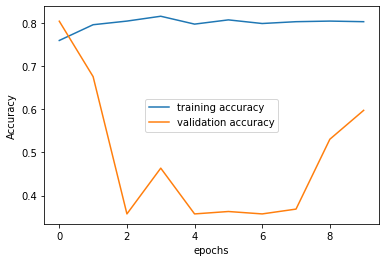

In [ ]:
import matplotlib.pyplot as plt
h=hist.history
plt.plot(h["accuracy"], label="training accuracy")
plt.plot(h["val_accuracy"], label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)
print(model.score(x,y))

0.8002244668911336
